In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import copy
import importlib
import functions
import numpy as np
import json

In [40]:
from functions import gov_exp

In [41]:
importlib.reload(functions)

<module 'functions' from 'c:\\Users\\Lenovo\\Documents\\Études\\Ecole_Ingénieur\\2A\\TR-Economie\\Projet_de_recherche\\analysingEffectOfHealthPlanInFrance\\code\\functions.py'>

# OPTICAL FIELD

In [42]:
french_optical_brands = ['MARIUS MOREL',
 'JIMMY FAIRLY',
 'ALAIN AFFLELOU',
 'OPAL',
 "L'AMY",
 'HENRY JULLIEN',
 'ROUSSILHE',
 'PETIT LUNETIER']

international_optical_brands = ['MARIUS MOREL', 'JIMMY FAIRLY', 'ALAIN AFFLELOU', 'SAFILO-FRANCE', 'ESSILOR']

## Government spending on the entire optical sector

In [43]:
optical = gov_exp(inflation_adjustment=True, sector="optical", mask={"OPTIQUE":["contains", "L_SC1", "and"]}, indent=0)

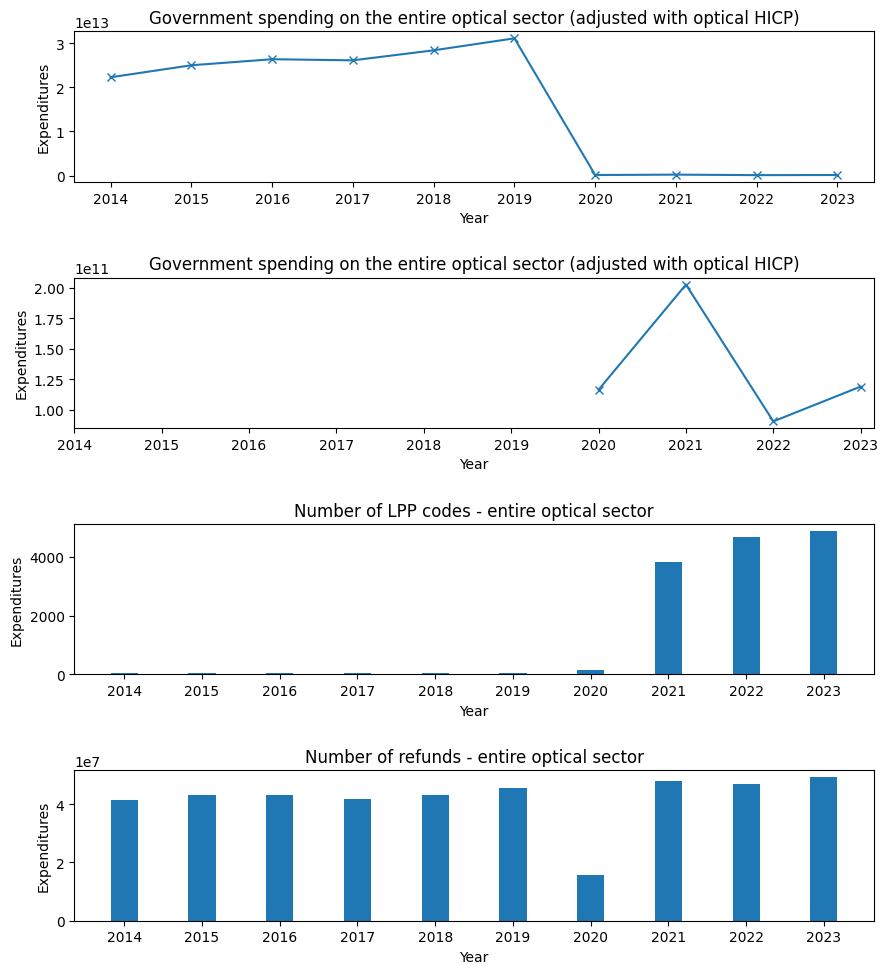

In [44]:
width = 0.35
list_years = np.array([int(year) for year in optical[0].keys()])
fig, axes = plt.subplots(4, 1, figsize=(9, 10))
axes = axes.flatten()

axes[0].plot(list_years, optical[0].values(), color="#1f77b4", marker="x")
axes[0].set_title(f'Government spending on the entire optical sector (adjusted with optical HICP)')

axes[1].plot(list_years[6:], list(optical[0].values())[6:], color="#1f77b4", marker="x")
axes[1].set_title(f'Government spending on the entire optical sector (adjusted with optical HICP)')

axes[2].bar(list_years, optical[1].values(), width=width, color="#1f77b4")
axes[2].set_title(f'Number of LPP codes - entire optical sector')

axes[3].bar(list_years, optical[2].values(), width=width, color="#1f77b4")
axes[3].set_title(f'Number of refunds - entire optical sector')

for i in range(len(axes)):

    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Expenditures')
    axes[i].set_xticks(list_years)

plt.tight_layout()
plt.show()

## Government expenditures for different french brands (class A compared to everything else) - Optical

In [45]:
import json
import numpy as np

In [46]:
with open('../data/gov_exp_for_different_french_brands_optical_field_(not_other_filter)', 'r', encoding='utf-8') as f:
    dataC0 = json.load(f)
with open('../data/classA_gov_exp_for_different_french_brands_optical_field', 'r', encoding='utf-8') as f:
    dataCA = json.load(f)

list_years = np.array([int(year) for year in dataC0["MARIUS MOREL"][0].keys()])

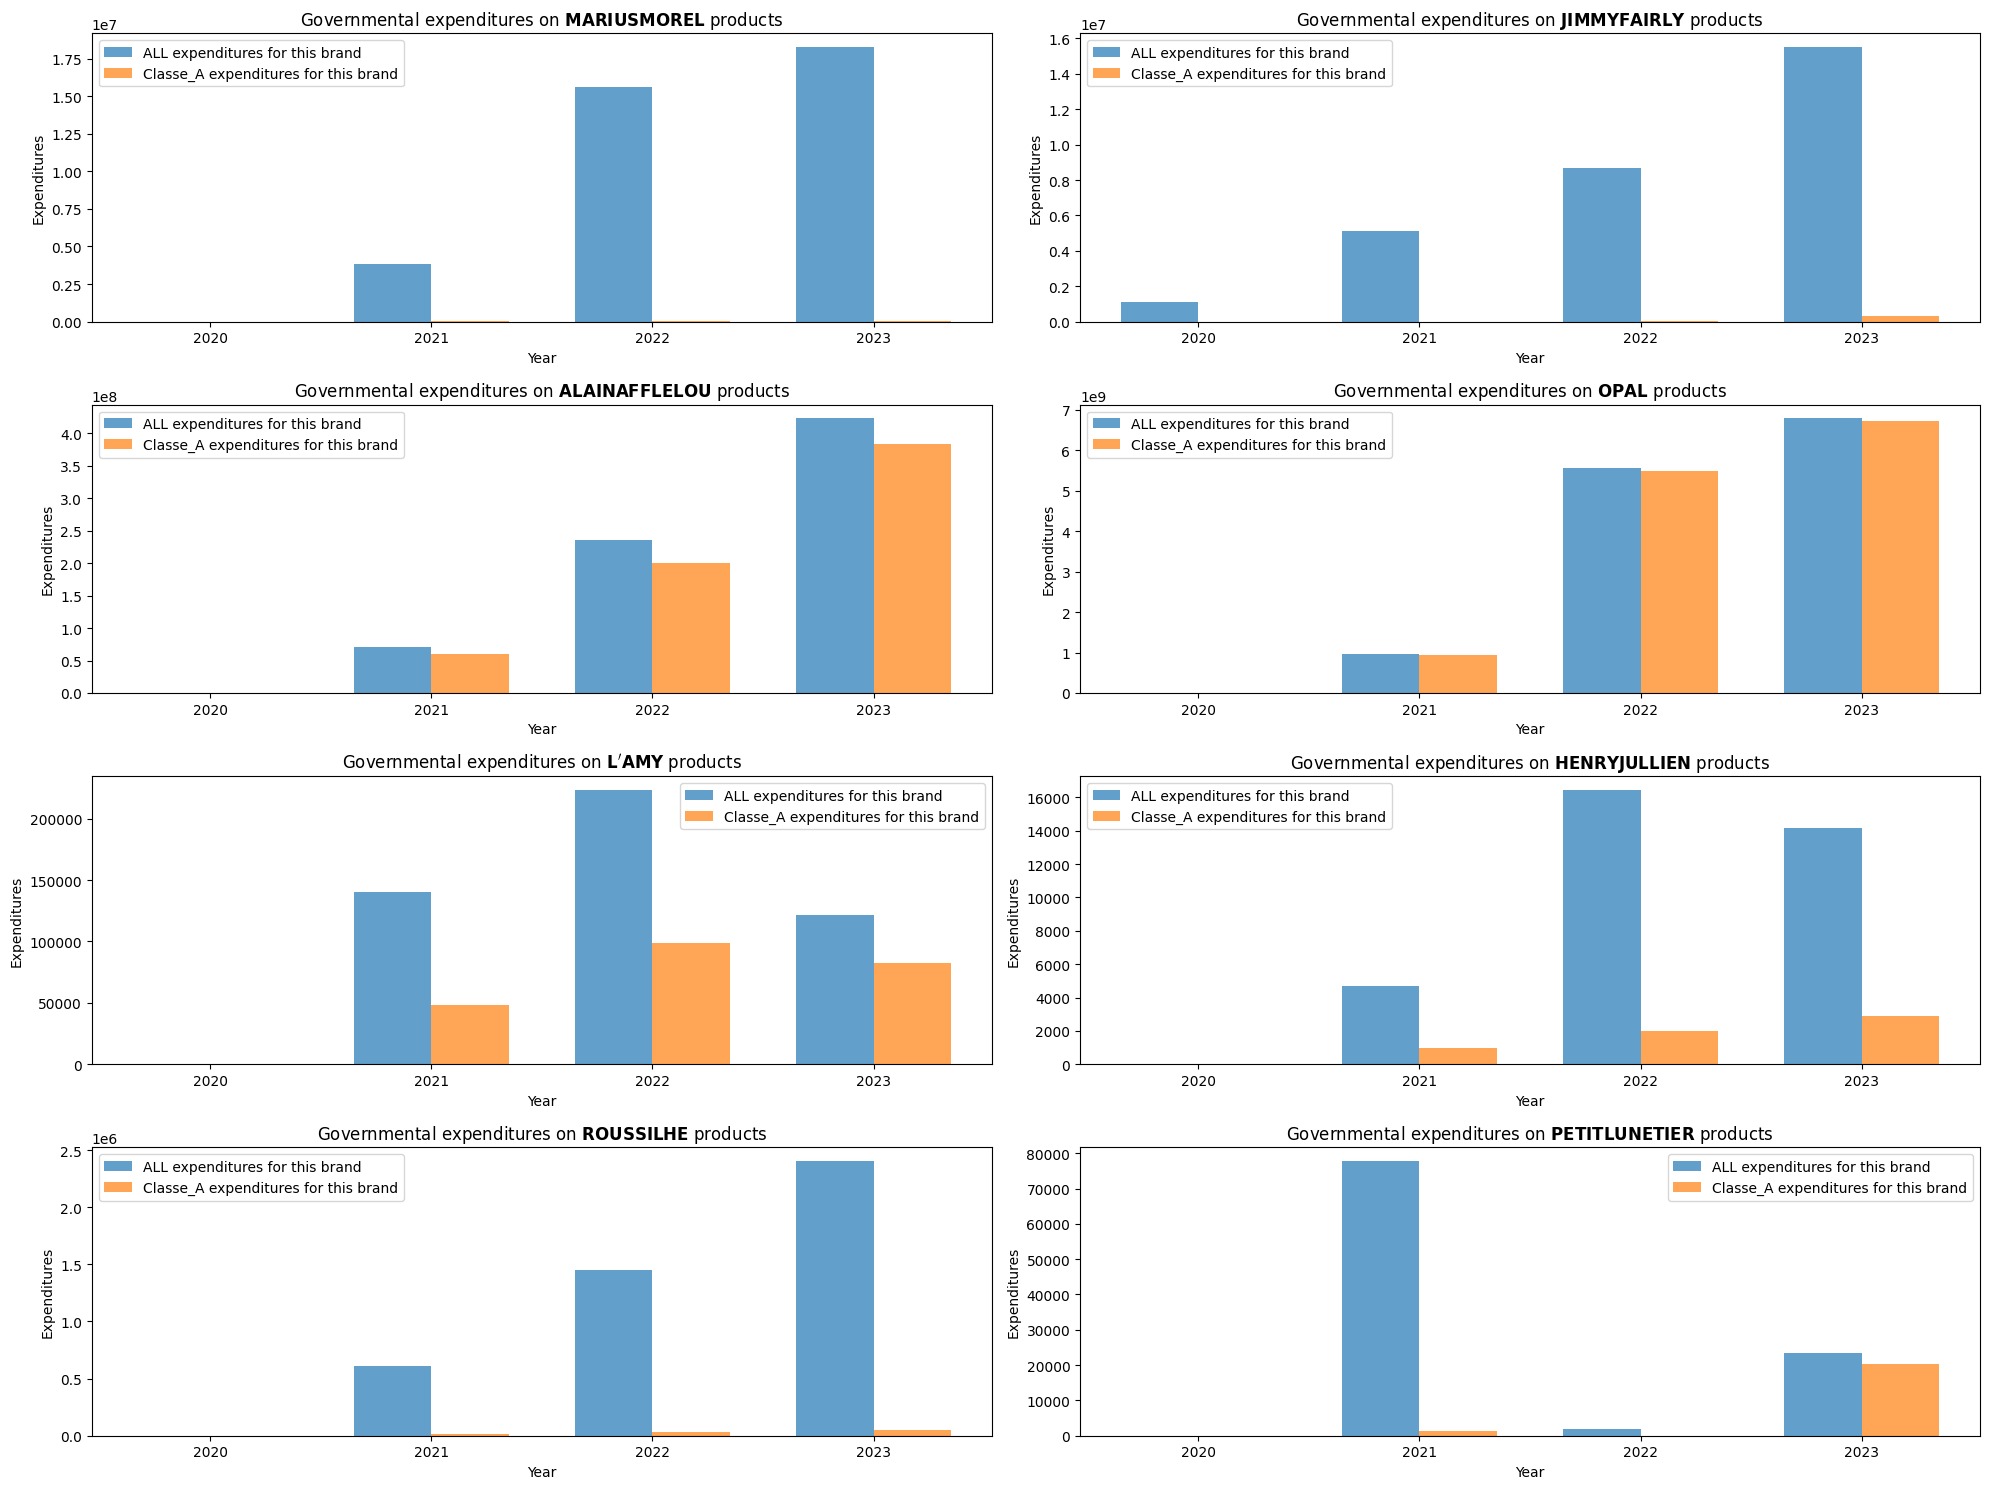

In [47]:
width = 0.35

fig, axes = plt.subplots(4, 2, figsize=(20, 15))

axes = axes.flatten()

count=0

for brand in french_optical_brands:

    axe = axes[count]
    axe.bar(list_years - width/2, dataC0[brand][0].values(), width=width, color="#1f77b4", label=f"ALL expenditures for this brand", alpha=0.7)
    axe.bar(list_years + width/2, dataCA[brand][0].values(), width=width, color="#ff7f0e", label=f"Classe_A expenditures for this brand", alpha=0.7)
    
    axe.set_title(f'Governmental expenditures on $\\mathbf{{{brand}}}$ products')
    axe.set_xlabel('Year')
    axe.set_ylabel('Expenditures')
    axe.legend()

    axe.set_xticks(list_years)  # Assure que seules les années entières sont utilisées comme labels
    #axe.set_xticklabels([str(int(year)) for year in list_years])  # Affiche les années entières
    
    count += 1

    plt.tight_layout()

plt.show()

## Number of refunds for different brands - Optical

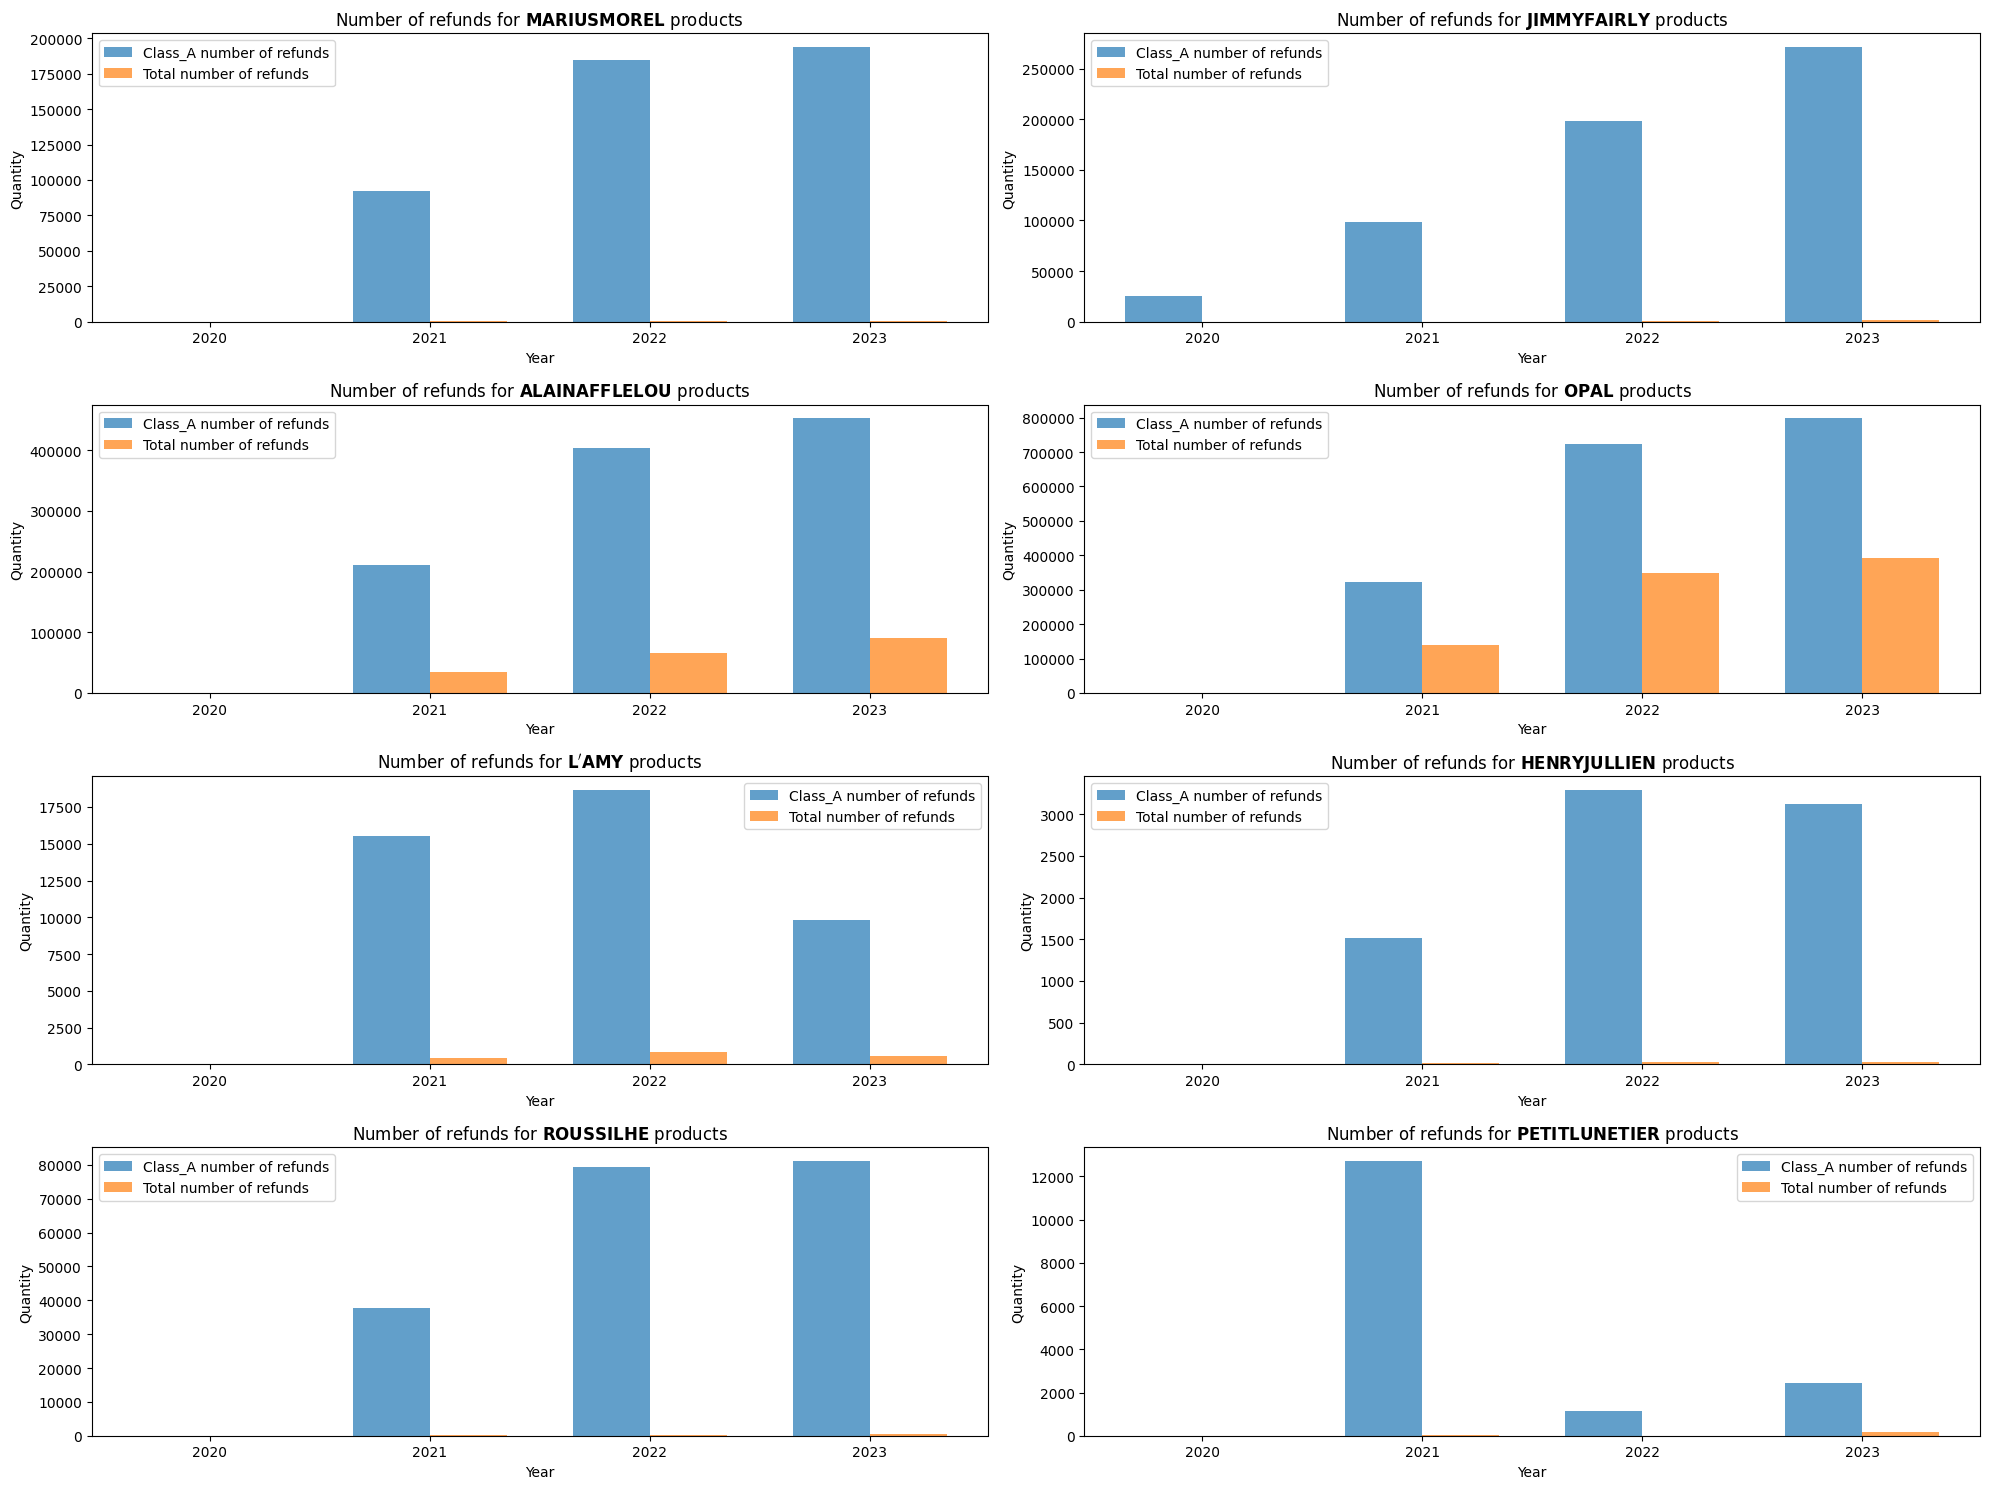

In [48]:
fig, axes = plt.subplots(4, 2, figsize=(20, 15))

axes = axes.flatten()

count=0

for brand in french_optical_brands:

    axe = axes[count]
    axe.bar(list_years - width/2, dataC0[brand][2].values(), width=width, color="#1f77b4", label=f"Class_A number of refunds", alpha=0.7)
    axe.bar(list_years + width/2, dataCA[brand][2].values(), width=width, color="#ff7f0e", label=f"Total number of refunds", alpha=0.7)
    
    axe.set_title(f'Number of refunds for $\\mathbf{{{brand}}}$ products')
    axe.set_xlabel('Year')
    axe.set_ylabel('Quantity')
    axe.legend()

    axe.set_xticks(list_years)  # ensure that only entire years are used as labels
    
    count += 1

    plt.tight_layout()

plt.show()

## Government expenditures for different international brands (class A compared to everything else) - Optical

In [49]:
import json
import numpy as np

In [50]:
with open('../data/gov_exp_for_different_international_brands_optical_field_(not_other_filter)', 'r', encoding='utf-8') as f:
    dataC0 = json.load(f)
with open('../data/classA_gov_exp_for_different_international_brands_optical_field', 'r', encoding='utf-8') as f:
    dataCA = json.load(f)

list_years = np.array([int(year) for year in dataC0["MARIUS MOREL"][0].keys()])

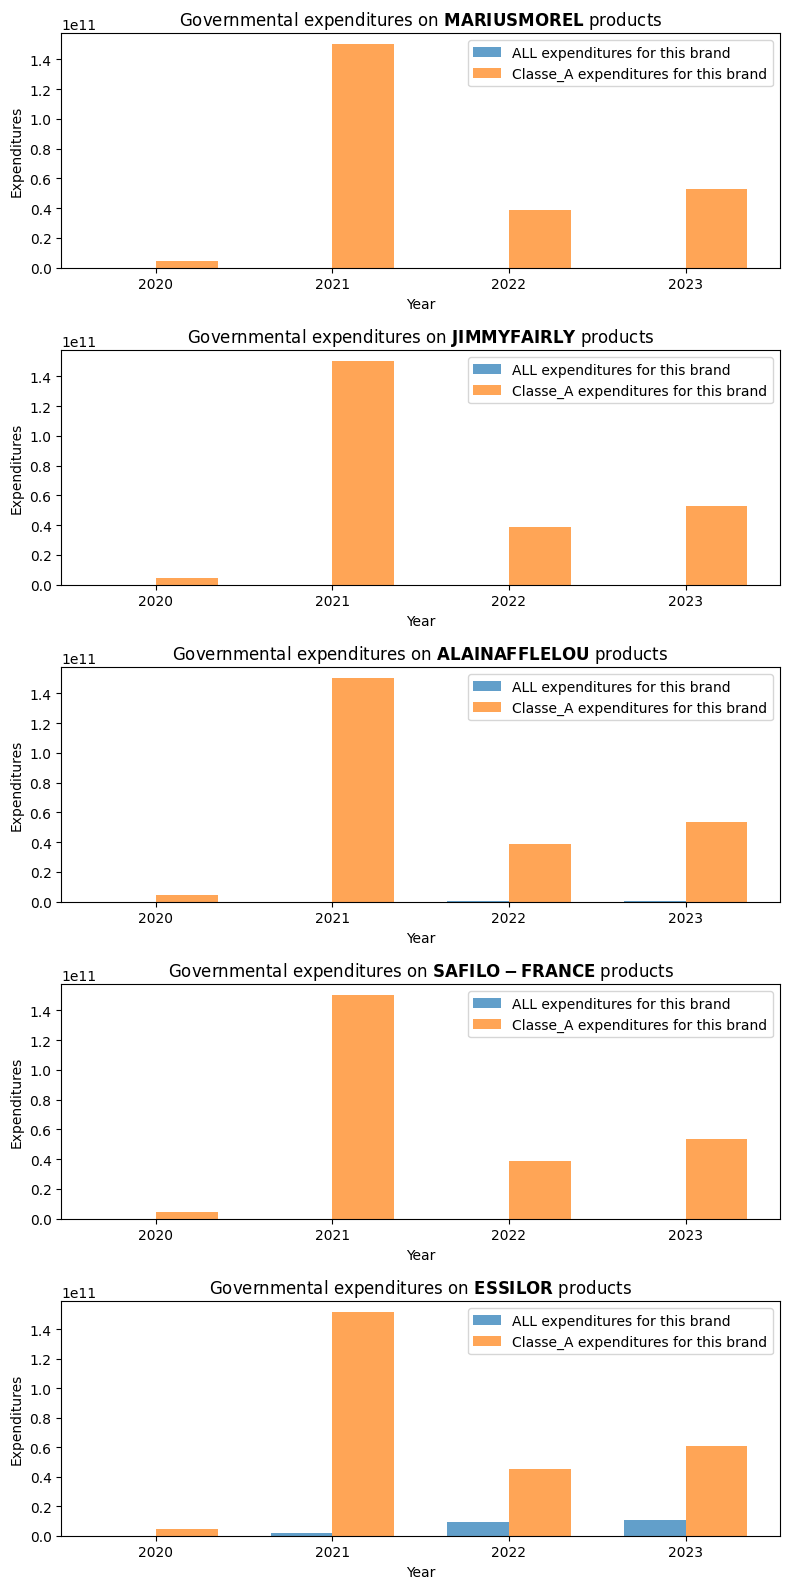

In [51]:
width = 0.35

fig, axes = plt.subplots(5, 1, figsize=(8, 16))

axes = axes.flatten()

count=0

for brand in international_optical_brands:

    axe = axes[count]
    axe.bar(list_years - width/2, dataC0[brand][0].values(), width=width, color="#1f77b4", label=f"ALL expenditures for this brand", alpha=0.7)
    axe.bar(list_years + width/2, dataCA[brand][0].values(), width=width, color="#ff7f0e", label=f"Classe_A expenditures for this brand", alpha=0.7)
    
    axe.set_title(f'Governmental expenditures on $\\mathbf{{{brand}}}$ products')
    axe.set_xlabel('Year')
    axe.set_ylabel('Expenditures')
    axe.legend()

    axe.set_xticks(list_years)  # Assure que seules les années entières sont utilisées comme labels
    #axe.set_xticklabels([str(int(year)) for year in list_years])  # Affiche les années entières
    
    count += 1

    plt.tight_layout()

plt.show()

## Number of refunds for different international brands - Optical

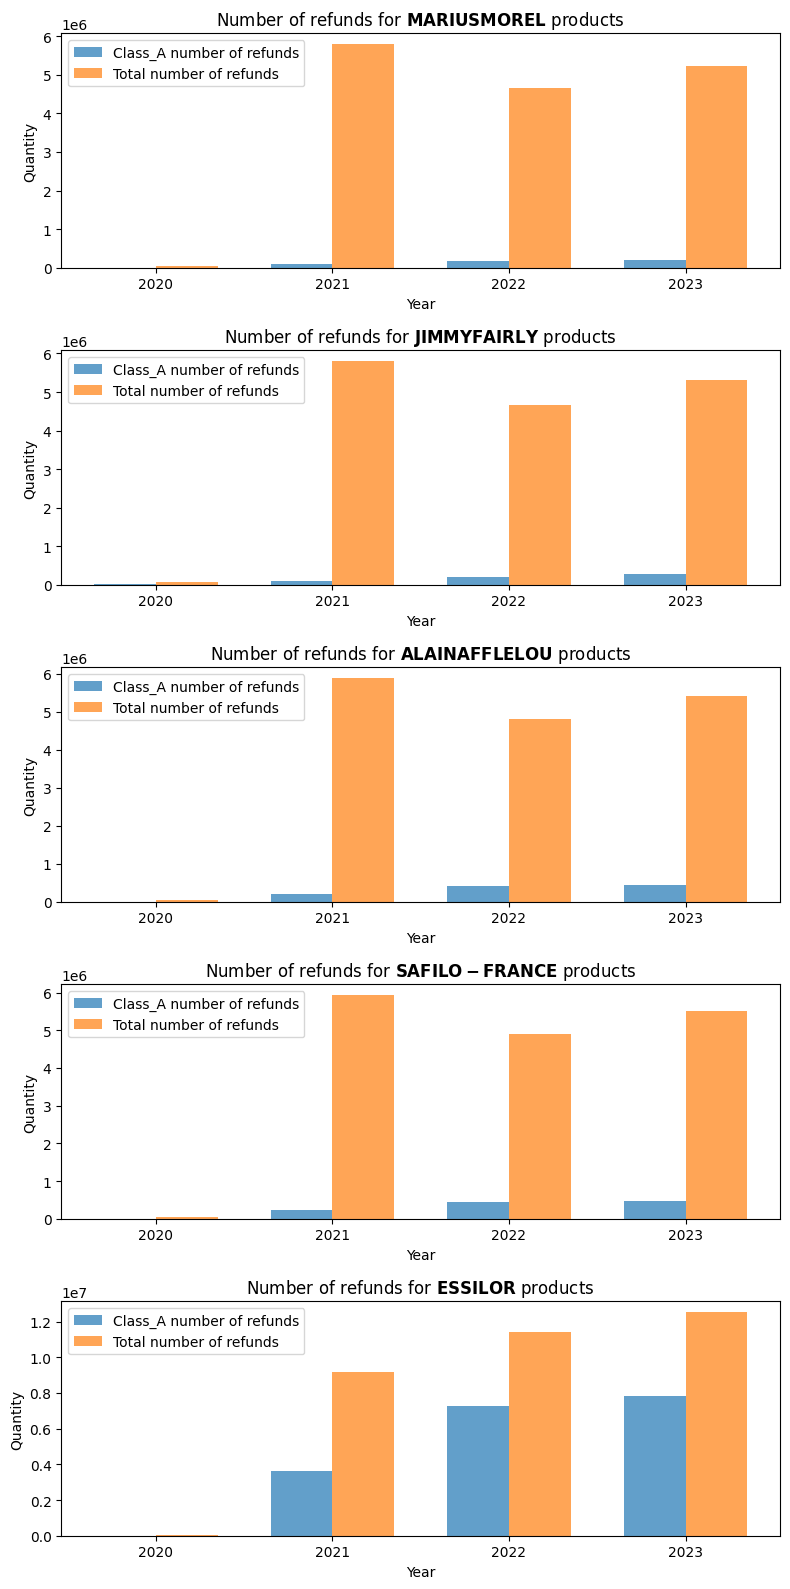

In [52]:
fig, axes = plt.subplots(5, 1, figsize=(8, 16))

axes = axes.flatten()

count=0

for brand in international_optical_brands:

    axe = axes[count]
    axe.bar(list_years - width/2, dataC0[brand][2].values(), width=width, color="#1f77b4", label=f"Class_A number of refunds", alpha=0.7)
    axe.bar(list_years + width/2, dataCA[brand][2].values(), width=width, color="#ff7f0e", label=f"Total number of refunds", alpha=0.7)
    
    axe.set_title(f'Number of refunds for $\\mathbf{{{brand}}}$ products')
    axe.set_xlabel('Year')
    axe.set_ylabel('Quantity')
    axe.legend()

    axe.set_xticks(list_years)  # ensure that only entire years are used as labels
    
    count += 1

    plt.tight_layout()

plt.show()

# HEARING FIELD

## Government spending on the entire hearing sector

In [53]:
hearing = gov_exp(inflation_adjustment=False, sector="hearing", mask={"AUDIO":["contains", "L_SC1", "or"], "DMI":["contains", "L_SC1", "or"]}, indent=0)

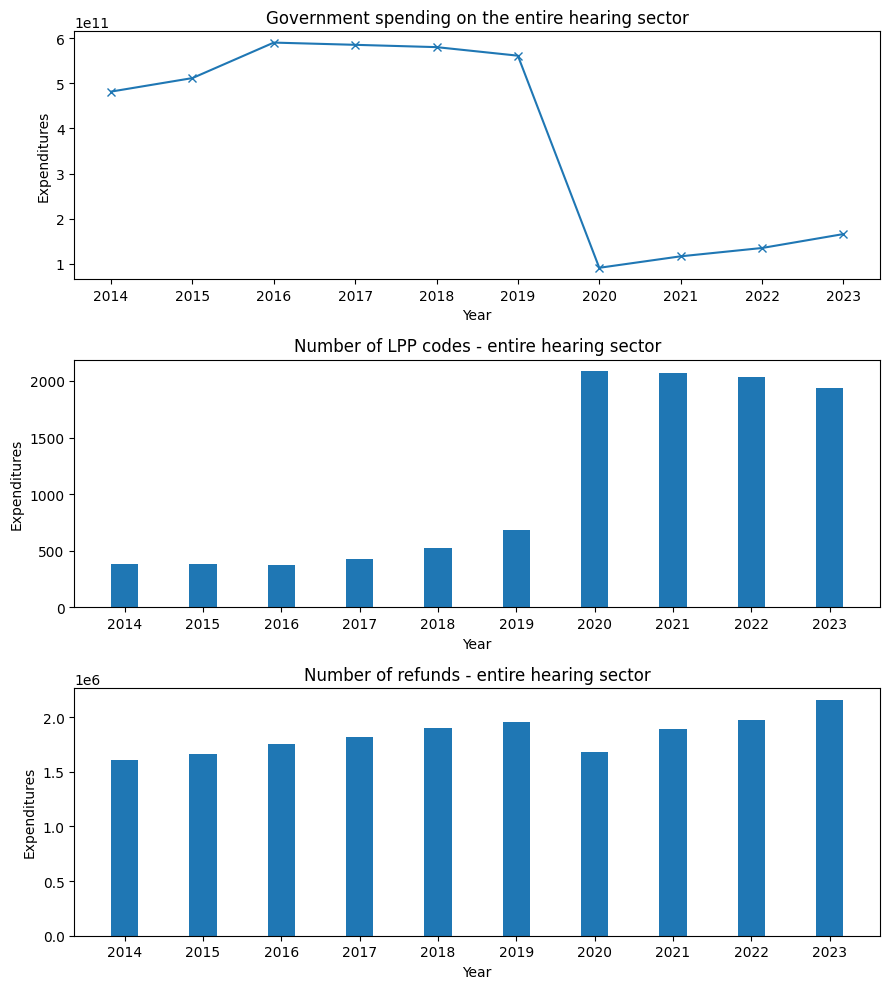

In [54]:
width = 0.35
list_years = np.array([int(year) for year in hearing[0].keys()])
fig, axes = plt.subplots(3, 1, figsize=(9, 10))
axes = axes.flatten()

axes[0].plot(list_years, hearing[0].values(), color="#1f77b4", marker="x")
axes[0].set_title(f'Government spending on the entire hearing sector')

axes[1].bar(list_years, hearing[1].values(), width=width, color="#1f77b4")
axes[1].set_title(f'Number of LPP codes - entire hearing sector')

axes[2].bar(list_years, hearing[2].values(), width=width, color="#1f77b4")
axes[2].set_title(f'Number of refunds - entire hearing sector')

for i in range(len(axes)):
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Expenditures')
    axes[i].set_xticks(list_years)

plt.tight_layout()
plt.show()

## Government expenditures for different brands (class I and class II) - Hearing

In [55]:
hearing_brands = ['STARKEY FRANCE', 'SONOVA FRANCE', 'PRODITION', 'WIDEX', 'SIVANTOS', 'GN HEARING SAS', 'BIOTONE TECH', 'SUPERVISION SAS', 'MEDISOUND', 'SIGNIA']

with open('../data/classI_gov_exp_for_different_brands_hearing_field', 'r', encoding='utf-8') as f:
    dataC1 = json.load(f)
with open('../data/classII_gov_exp_for_different_brands_hearing_field', 'r', encoding='utf-8') as f:
    dataC2 = json.load(f)

list_years = np.array([int(year) for year in dataC1["STARKEY FRANCE"][0].keys()])

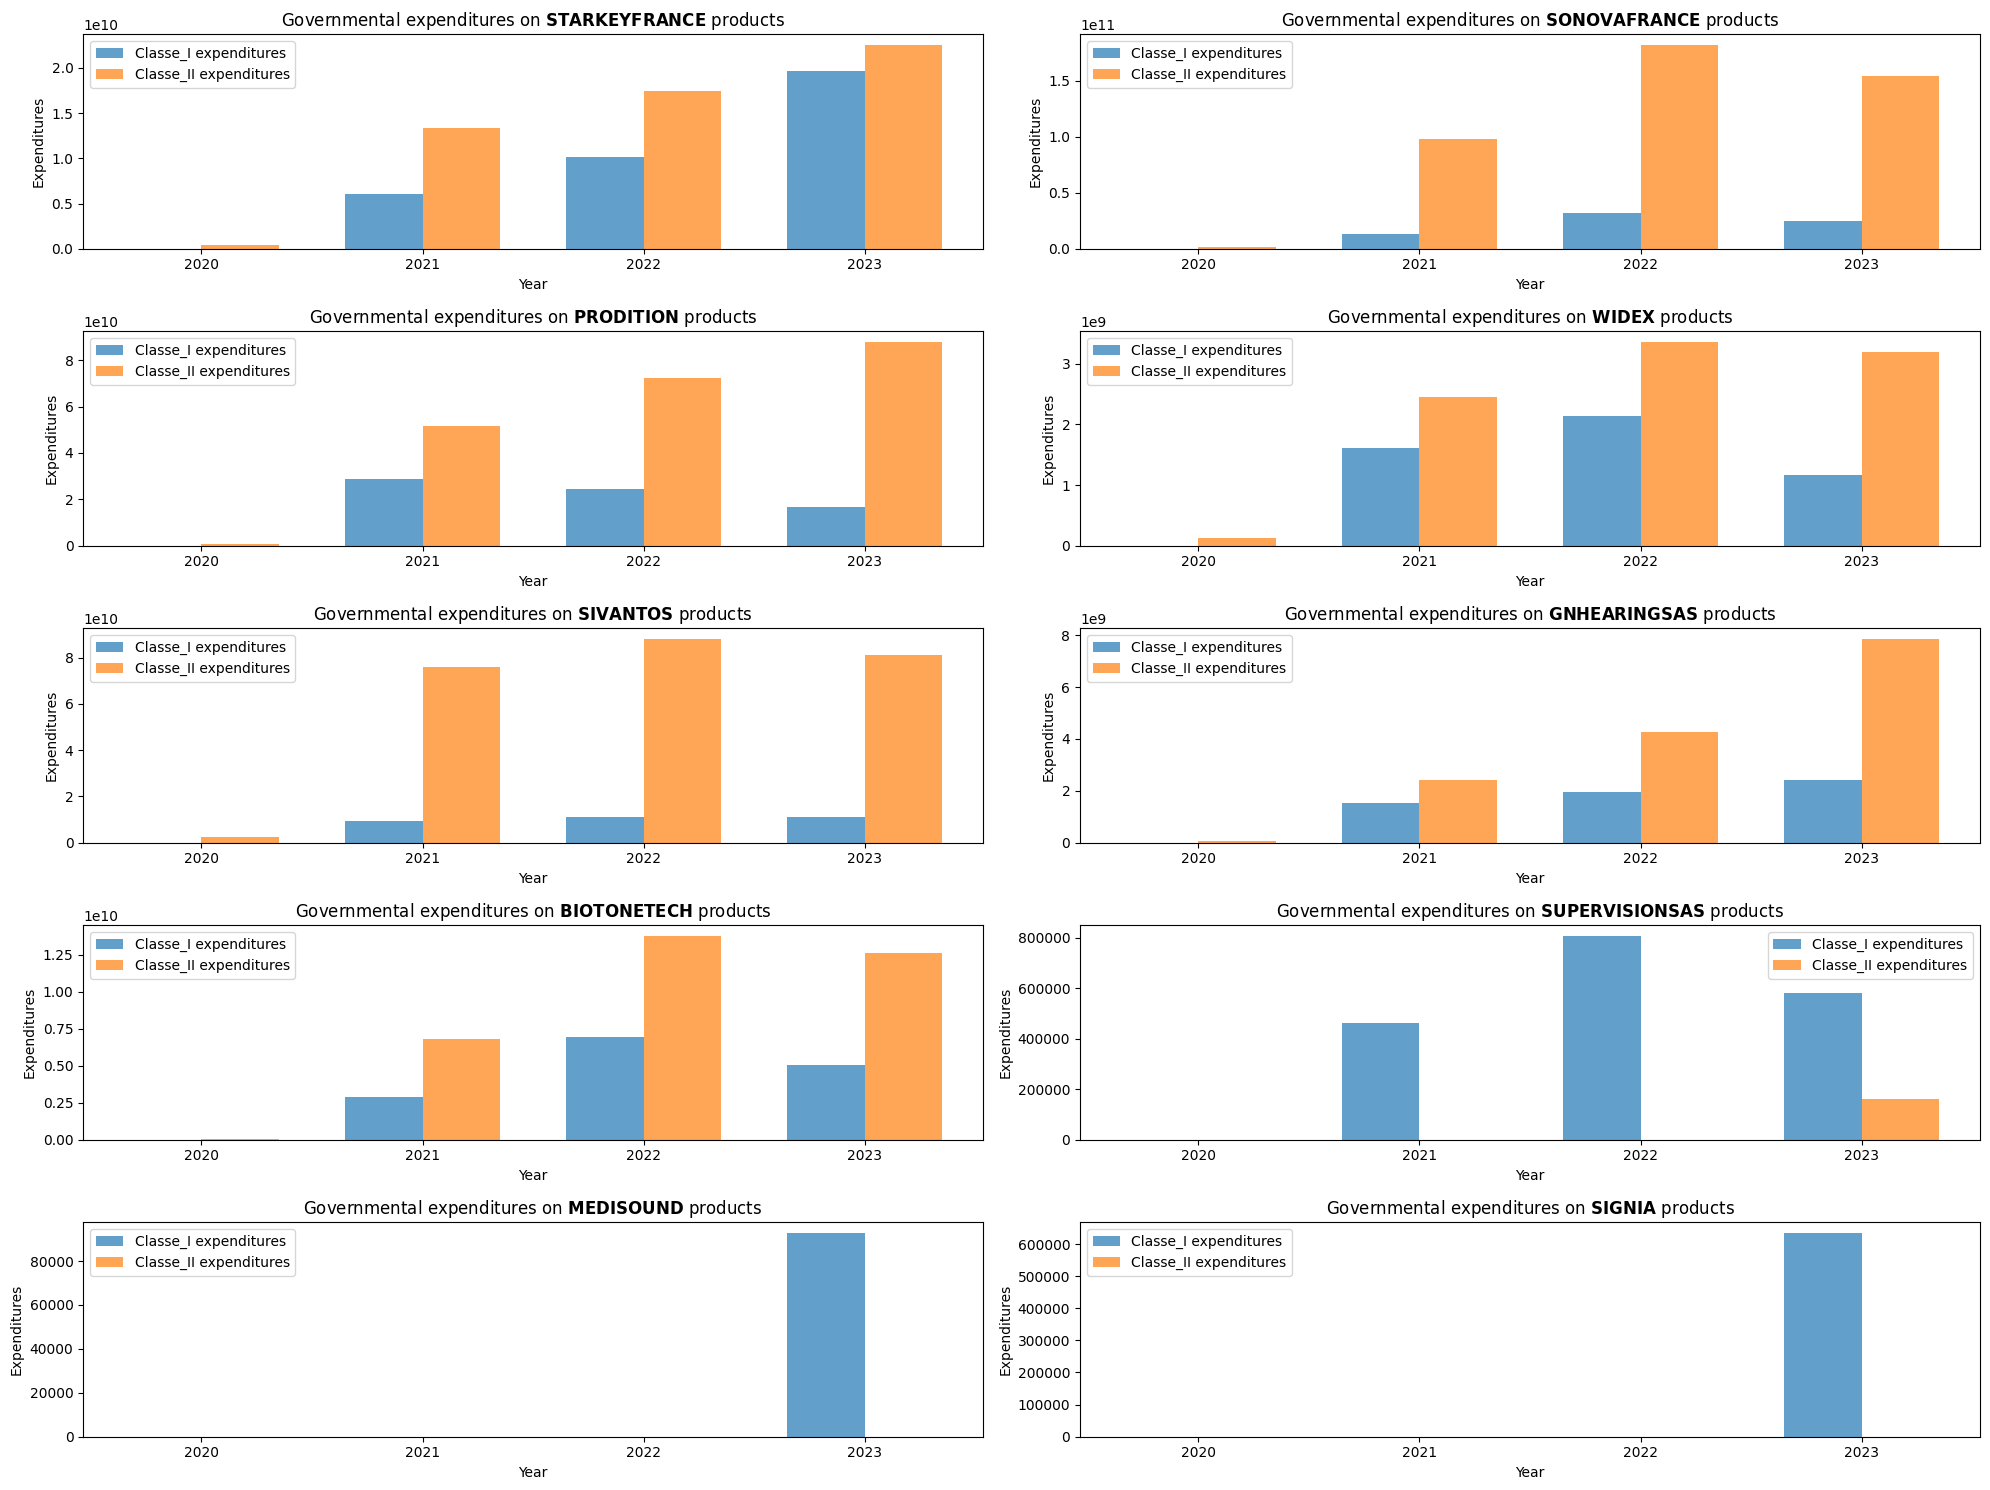

In [56]:
width = 0.35

fig, axes = plt.subplots(5, 2, figsize=(20, 15))

axes = axes.flatten()

count=0

for brand in hearing_brands:

    axe = axes[count]
    axe.bar(list_years - width/2, dataC1[brand][0].values(), width=width, color="#1f77b4", label=f"Classe_I expenditures", alpha=0.7)
    axe.bar(list_years + width/2, dataC2[brand][0].values(), width=width, color="#ff7f0e", label=f"Classe_II expenditures", alpha=0.7)
    
    axe.set_title(f'Governmental expenditures on $\\mathbf{{{brand}}}$ products')
    axe.set_xlabel('Year')
    axe.set_ylabel('Expenditures')
    axe.legend()

    axe.set_xticks(list_years)  # Assure que seules les années entières sont utilisées comme labels
    #axe.set_xticklabels([str(int(year)) for year in list_years])  # Affiche les années entières
    
    count += 1

    plt.tight_layout()

plt.show()

## Number of refunds for different brands (class I and class II) - Hearing

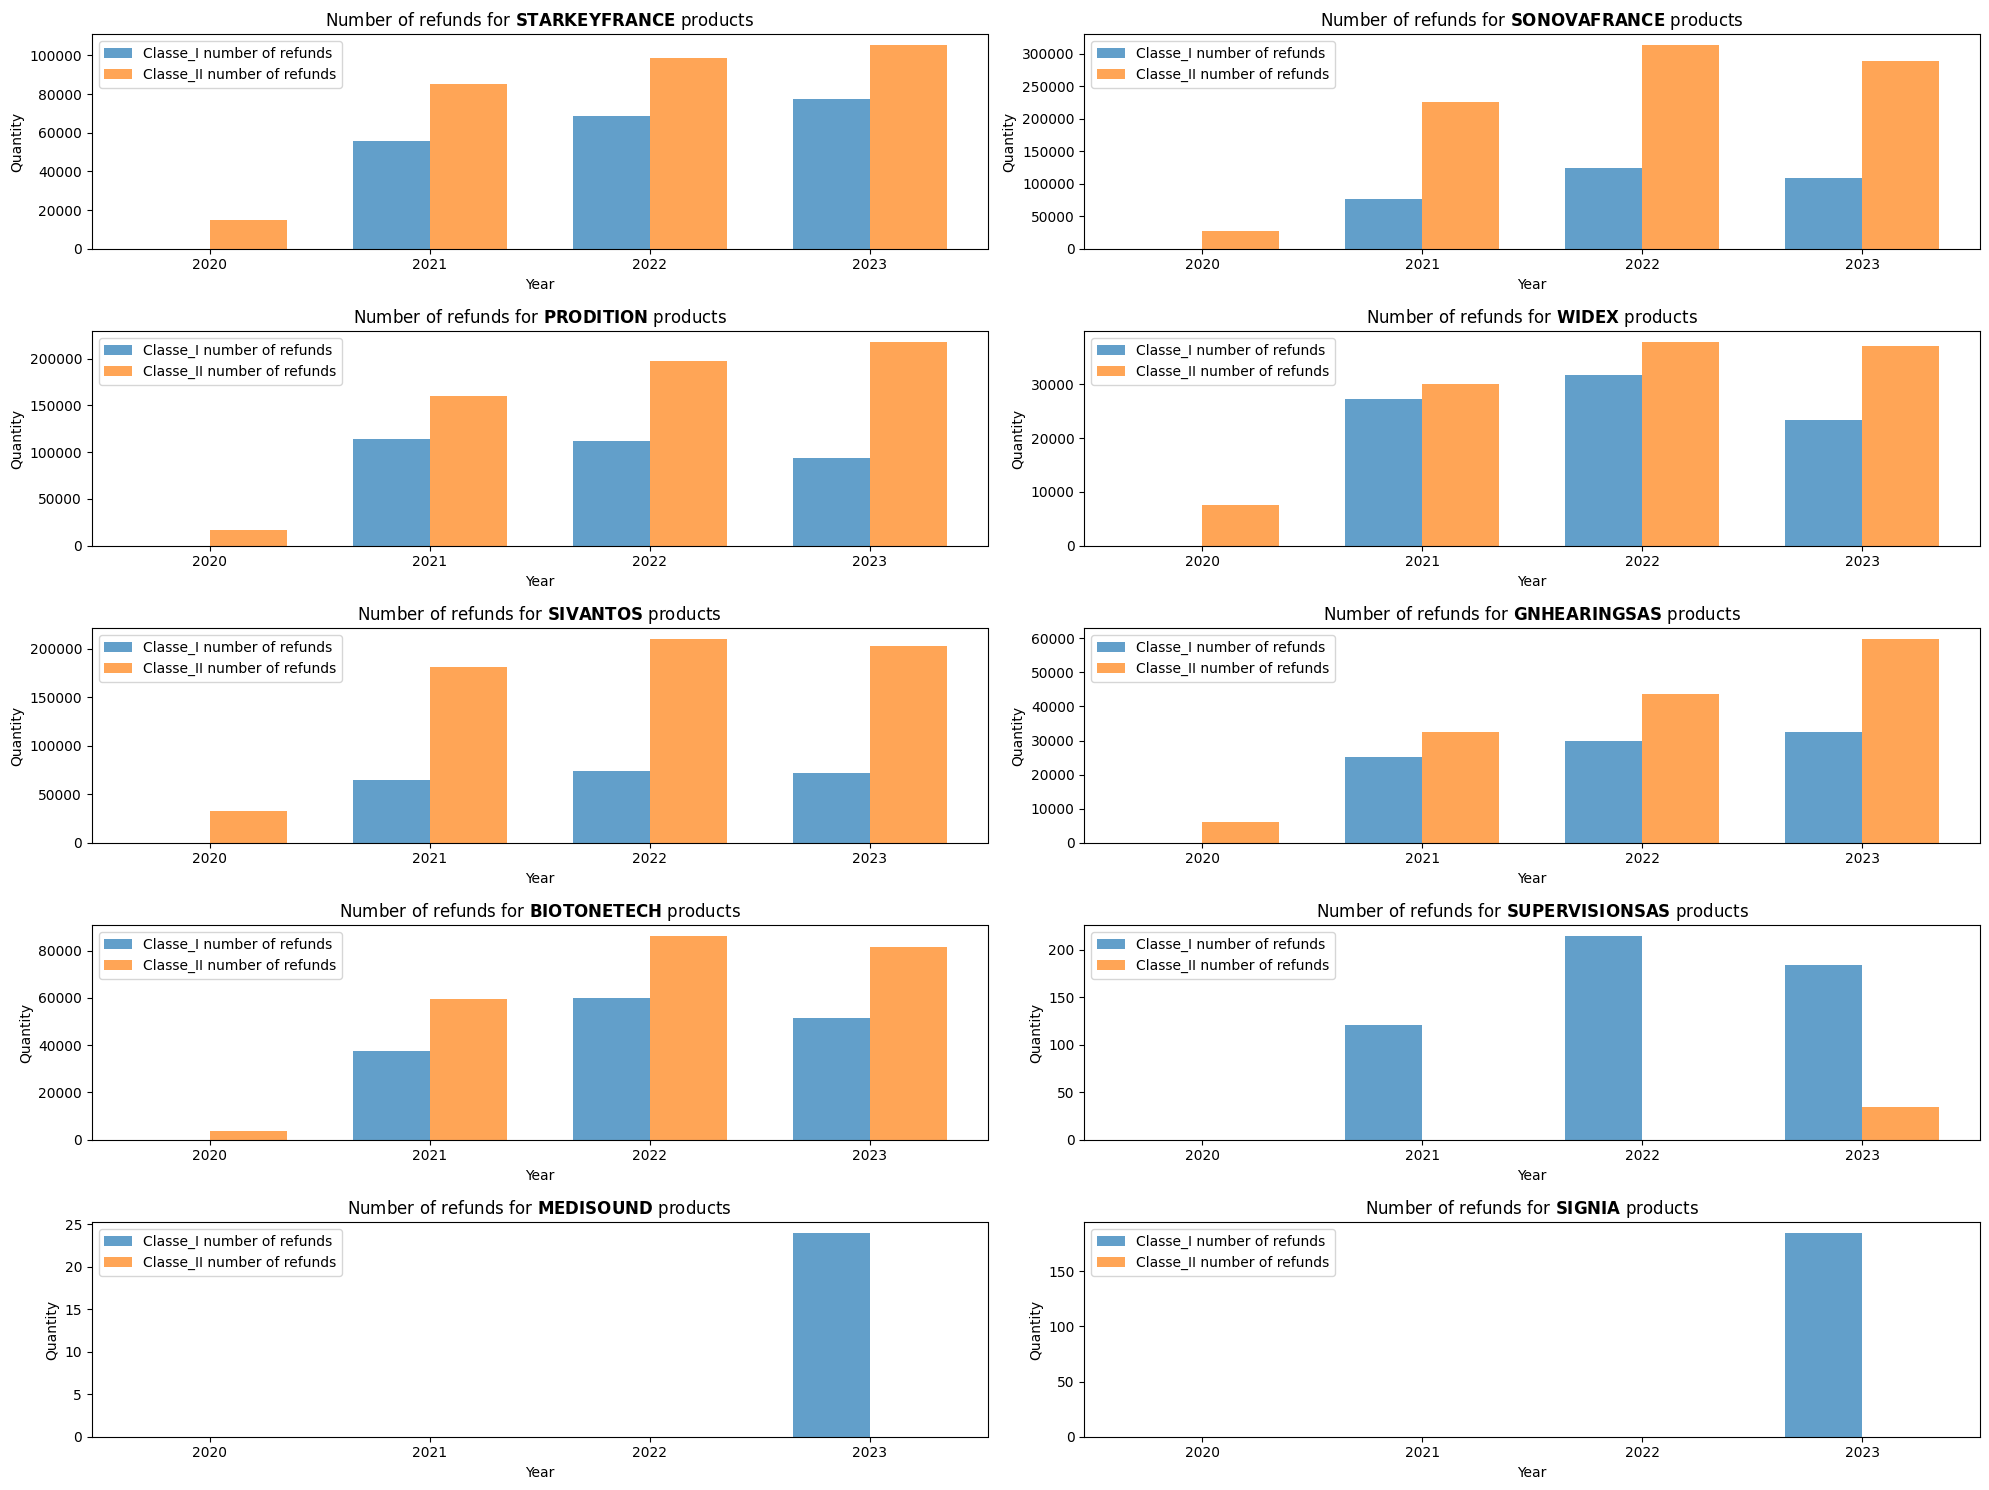

In [57]:
fig, axes = plt.subplots(5, 2, figsize=(20, 15))

axes = axes.flatten()

count=0

for brand in hearing_brands:

    axe = axes[count]
    axe.bar(list_years - width/2, dataC1[brand][2].values(), width=width, color="#1f77b4", label=f"Classe_I number of refunds", alpha=0.7)
    axe.bar(list_years + width/2, dataC2[brand][2].values(), width=width, color="#ff7f0e", label=f"Classe_II number of refunds", alpha=0.7)
    
    axe.set_title(f'Number of refunds for $\\mathbf{{{brand}}}$ products')
    axe.set_xlabel('Year')
    axe.set_ylabel('Quantity')
    axe.legend()

    axe.set_xticks(list_years)  # ensure that only entire years are used as labels
    
    count += 1

    plt.tight_layout()

plt.show()